# Import Libraries

In [20]:
import os
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtain Data & Pre-Process Data

Determine batch size of train and test sets

In [2]:
train_folder = 'Data/images/training_set'
test_folder = 'Data/images/test_set'
classes = ['cats', 'dogs']

train_imgs = []
test_imgs = []

for img_class in classes:
    train_imgs.extend([file for file in os.listdir(train_folder+'/'+img_class) if file.endswith('.jpg')])
    test_imgs.extend([file for file in os.listdir(test_folder+'/'+img_class) if file.endswith('.jpg')])
    
train_batch_size = len(train_imgs)
test_batch_size = len(test_imgs)

print(train_batch_size)
print(test_batch_size)

8000
2000


Generate image data

In [4]:
output_folder = 'Data/image_data'

train_generator = ImageDataGenerator().flow_from_directory(
                        train_folder, target_size=(224, 224), batch_size = train_batch_size)

test_generator = ImageDataGenerator().flow_from_directory(
                        test_folder, target_size=(224, 224), batch_size = test_batch_size) 

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Split image data into image and label variables

In [6]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

# Explore Data

Calculate image data shape

In [9]:
print('Train images shape: ', train_images.shape)
print('Test images shape: ', test_images.shape)

Train images shape:  (8000, 224, 224, 3)
Test images shape:  (2000, 224, 224, 3)


Calculate label data shape

In [10]:
print('Train labels shape: ', train_labels.shape)
print('Test labels shape: ', test_labels.shape)

Train labels shape:  (8000, 2)
Test labels shape:  (2000, 2)


Calculate label class distribution

In [14]:
train_labels_df = pd.DataFrame(train_labels)
test_labels_df = pd.DataFrame(test_labels)
total_labels_df = pd.concat([train_labels_df, test_labels_df], axis=0)


print('Train set class distribution')
print(train_labels_df.mean())

print('Test set class distribution')
print(test_labels_df.mean())

print('Overall class distribution')
print(total_labels_df.mean())

Train set class distribution
0    0.5
1    0.5
dtype: float32
Test set class distribution
0    0.5
1    0.5
dtype: float32
Overall class distribution
0    0.5
1    0.5
dtype: float32


Plot image class distribution

Text(0, 0.5, 'Count')

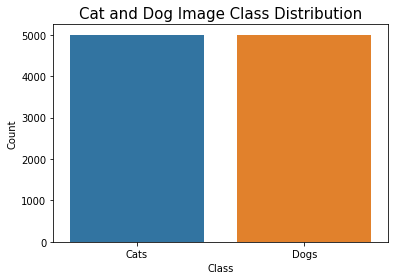

In [24]:
fig, ax = plt.subplots()
sns.countplot(x=0, data=total_labels_df, ax=ax)
ax.set_title('Cat and Dog Image Class Distribution', fontsize=15)
ax.set_xticklabels(['Cats', 'Dogs'])
ax.set_xlabel('Class')
ax.set_ylabel('Count')

# Model data